In [1]:
import keras
import numpy as np

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Import the MNIST Dataset
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/font_manager.py:278: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


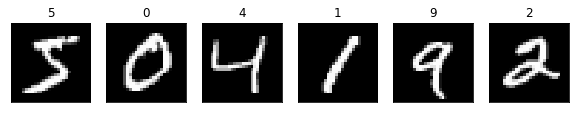

In [7]:
# Visualize the first 5 digits
# Matplotlib subplot(nrows, ncols, index, **kwargs)
fig = plt.figure(figsize = (10, 10))
for i in range(6):
    ax = fig.add_subplot(1, 6, i+1, xticks = [], yticks = [])
    ax.imshow(X_train[i], cmap = 'gray')
    ax.set_title(str(y_train[i]))

In [10]:
# Analyze an image
import pprint
print ("Shape of 1 image", X_train[1].shape)
print ("Shape of input training samples", X_train.shape)
pprint.pprint(X_train[1])

Shape of 1 image (28, 28)
Shape of input training samples (60000, 28, 28)
array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 

In [11]:
# Rescale the X_train and X_test so that it is normalized between 0 and 1
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [13]:
# Analyse the labels
print (y_test[1])
print ("Shape of one label", y_train[1].shape)
print ("Shape of test labels dataset", y_train.shape)

2
Shape of one label ()
Shape of test labels dataset (60000,)


In [24]:
# One hot encode the test labels
y_train = keras.utils.np_utils.to_categorical(y_train, 10)
y_test = keras.utils.np_utils.to_categorical(y_test, 10)
print (y_train[:5])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


#### Now we have to vectorize the input because the input data is a series of matrices.
#### This includes flattening the input matrices.
#### Since each input is 28*28, the flat vector length will be 786.
#### This means, out input will have 786 nodes.
#### We will add 2 hidden layers of 512 nodes each will have a ReLU activation unit.
#### To combat overfitting, we will add 2 dropout layers. One between the two hidden layers and the other between hidden and output.
#### The output unit will have 10 nodes, each corresponding to one class in the y label.

In [35]:
from keras.layers import Dense, Flatten, Dropout
from keras.models import Sequential

In [45]:
# Define the model
model = Sequential()
model.add(Flatten(input_shape = X_train[1].shape))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))

# Model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


#### ReLU helps with the vanishing gradient problem. It leaves all the positive values alone and pushes the negative values to zero.

In [46]:
# Our loss function is categorical cross entropy
# Optimizer = rmsprop
# Evaluation metric = accuracy
model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

In [48]:
# Evaluate test accuracy BEFORE TRAINING
score = model.evaluate(X_test, y_test, verbose = 0)
accuracy = 100 * score[1]
print ('Test accuracy: ', accuracy, "%")

Test accuracy:  11.57 %


### Train the model
#### We will be using a validation set in the training phase. This is not the testing set. The validation set is only used to calculate how well we are doing in the training phase. The validation data is not used to update the weights (not used in the backprop calculations). The reason for using a validation set is that the testing set is truly what the model has never seen before and can be used for actual evaluation after training.

In [51]:
from keras.callbacks import ModelCheckpoint

# Train the model
# 20 % will be removed from training set and used as a validation set.
# The model checkpoint class permits us to save the model weights after each epoch.
# filepath is where we like to save the weights.
# When we set verbose = 1, the text output during the training process will let us know when the weights file is updated.
# After creating the checkpointer, it is passed to the model as a parameter. 

checkpointer = ModelCheckpoint(filepath = 'MNIST_Keras_best.hdf5', verbose = 1, save_best_only = True)
hist = model.fit(X_train, y_train, batch_size = 128, epochs = 10, validation_split = 0.2, 
                 callbacks = [checkpointer], verbose = 1, shuffle = True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 2s 42us/step - loss: 0.1114 - acc: 0.9668 - val_loss: 0.0941 - val_acc: 0.9729

Epoch 00001: val_loss improved from inf to 0.09409, saving model to MNIST_Keras_best.hdf5
Epoch 2/10
48000/48000 [==============================] - 2s 43us/step - loss: 0.0784 - acc: 0.9769 - val_loss: 0.0894 - val_acc: 0.9741

Epoch 00002: val_loss improved from 0.09409 to 0.08945, saving model to MNIST_Keras_best.hdf5
Epoch 3/10
48000/48000 [==============================] - 2s 42us/step - loss: 0.0622 - acc: 0.9810 - val_loss: 0.0937 - val_acc: 0.9745

Epoch 00003: val_loss did not improve from 0.08945
Epoch 4/10
48000/48000 [==============================] - 2s 42us/step - loss: 0.0529 - acc: 0.9841 - val_loss: 0.0923 - val_acc: 0.9769

Epoch 00004: val_loss did not improve from 0.08945
Epoch 5/10
48000/48000 [==============================] - 2s 42us/step - loss: 0.0441 - acc: 0.9865 - val_loss: 

In [53]:
# Evaluate the model again
score = model.evaluate(X_test, y_test, verbose = 0)
accuracy = score[1] * 100

# Print
print ("Test accuracy after training :", accuracy, "%")

Test accuracy after training : 98.2 %
